
*Note: I misread the deadline (apparent subconscious east coast bias), so am sharing this here in case anyone finds it useful.*


# Uncharted Territory
## Automated play charting with computer vision

### Chris Fenton


---
## Summary

- NFL analytics can improve by incorporating coaching concepts
- Coaching concepts can be catpured flexibly and efficiently with computer vision and transfer learning
    - An example: Man and zone defense coverages can be distinguished automatically
    - An insight: Zone coverages tend to be more effective
- Manual play charting could be mostly eliminated using a computer vision approach
---

NFL analysts and NFL coaches see football differently. Why is this the case?

#### Analysts see numbers

An analyst looks at plays and associates probabilities and quantities to the various play types, results, and decisions.  The analyst's thinking is shaped by the numerical data tables and models that they constantly look at.

**Image 1: An analyst's view - NFL play data**  

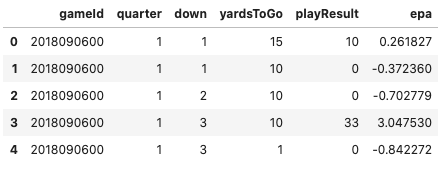

For the analyst, the clearest way a given football team can improve is to optimize these decisions in a way that maximizes the probability of a positive result.

#### Coaches see shapes and lines

From the coach's perspective, a play is like a battle plan. 11 players are directed so they will compliment each other by attacking or defending as much of the field as possible. To think spatially and teach players their roles, coaches commonly use shapes and symbols to represent the plan of action.

**Image 2: A coach's view - NFL play diagram**  
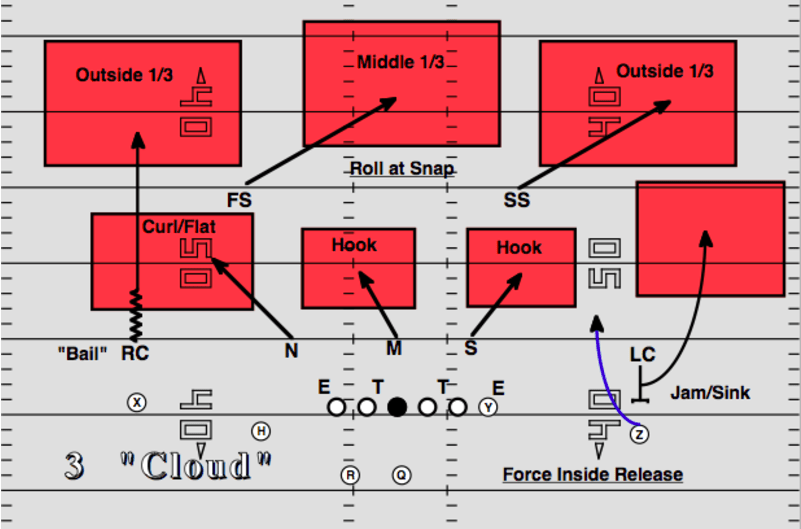

*Source: Matt Bowen, Bleacher Report*

For the coach, a primary factor in their decision making is arranging these shapes and movements in a way that will give the team the best chance to win.

#### The disconnect

The above assertions are generalizations, but they provide insight to one of the major barriers to analytic adoption by NFL coaches. If either group is using fundamentally different tools to see the game, and subsequently different languages (eg "EPA", "WPA" for analysts, and "robber", "plus split" for coaches), it will be difficult to for the two groups to communicate, thereby limiting or slowing the impact analytics can have.

#### How can we bridge this gap?

The most productive way analysts can close this gap is by incorporating coaching concepts into our work, allowing us to provide **data driven support for coaches in their own language.** 


With player tracking data, we have the opportunity to build analytics around the fundamental coaching concepts that govern each play. 


## This project: automated pass coverage charting

This project focuses on using tracking data to capture fundamental coaching concepts in the defensive passing game, and combining the analytical representation of these concepts with outcome measures.

In effect, we can use tracking data to automate the process of play charting (where a human watches each play and marks fundamental attributes about it). This means that anything that a coach cares about can be captured efficiently, and measured directly.

To prove this concept, I focused on capturing the most fundamental element of pass coverage.

#### Is the defense in man or zone coverage?

Pass coverage can be generally be organized by **man** (where defenders track a specific offensive receiver) or **zone** (where defenders cover a specified part of the field). This is the most fundamental dynamic of the pass coverage.

In reality, there are some complexities to this dichotomy. For instance, most man coverages include at least 1 zone defender, and many zone coverages can effectively morph into man coverage depending on the play (this is commonly called "match" coverage). However, in either case, most coverages can generally be classified as man or zone.

**Image 3: Man coverage**  
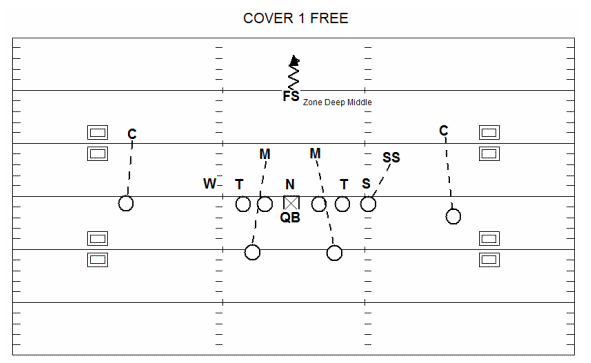
*Source: Chris Brown, Smart Football*  
**Image 4: Zone coverage**  
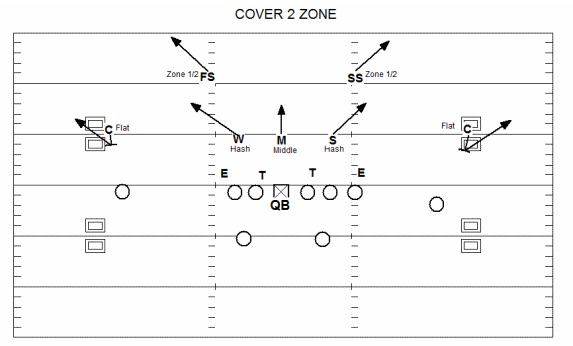
*Source: Chris Brown, Smart Football*

By recognizing whether the defense is in man or zone, we can start to build analytics aligned with how coaches approach the game.

## Automated play charting method

The general methodology for automatic play charting is as follows:

#### 1. Generate an image of the play from the time of snap to the moment the ball is thrown

Using tracking data, I graphed player movement on passing plays from moment of ball snap to moment he quarterback threw the ball or the play ended. This provided a graphical representation of both the defensive coverage and the offensive routes.  
*This imaging process was based on a method developed by Rob Mulla.*

**Image 5: Pre pass tracking data graphed to represent coverage scheme**  
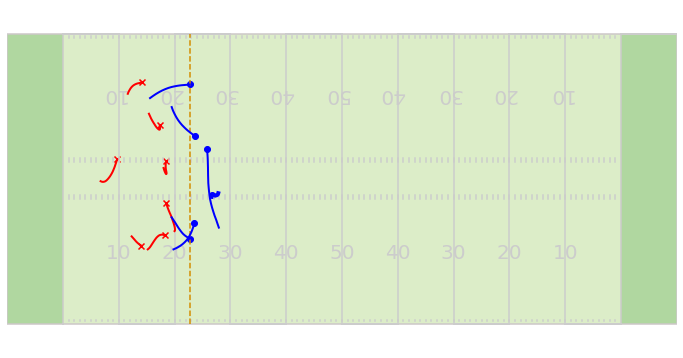
*Game Id: 2018092700*  
*Play Id: 646*  
*Label: Zone*

#### 2. Manually label the play as man or zone
With the plays represented as graphs, I labelled a set of randomly selected plays from weeks 1, 5, 10, and 15. 

For the above example, underneath coverage players do not track receivers directly, indicating zone coverage. Therefore, the play was labelled az Zone 

Generally, both categories are recognizable for most plays, but there are some exceptions where it was not clear. In those cases, plays were skipped to avoid confusing the model.

Also, plays that occurred within the opposing team's 15 (red area), or where the pass was thrown shortly after the snap were skipped, since they either lacked enough time or space to reveal the coverage.


#### 3. Feed the labelled images to a Convolutional Neural Network (CNN) model to build an automatic classifier

Next, I trained a model to recognize these play concepts. The architecture choice was transfer learning built on top of a pretrained model ([ResNet34](https://arxiv.org/abs/1512.03385)). While football plays don't directly resemble the real world images that ResNet34 was trained on, the concepts proved helpful in identify the shapes in football play diagrams.

128 images were used for model training from weeks 1,5,10.

Special care was taken to avoid model overfitting, stopping training once the metric of error rate stopped improving (epoch 11 below).

**Image 6: Model training**  
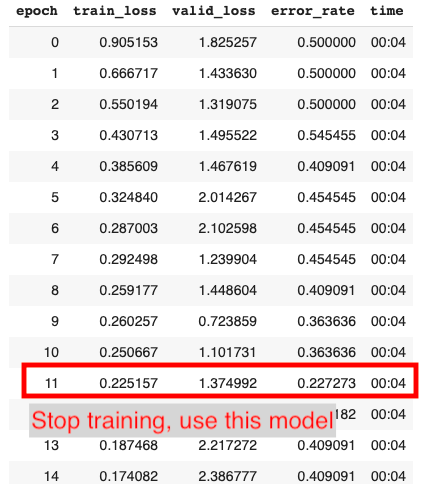

#### 4. Measure the results on a withheld set of test images

28 images were withheld as a test set from week 15. It was important to use a test set from games separate from the training games, so that the model had not seen these games before. A matchup between two teams may have specific patterns, so we can test generalization by looking at new matchups.

The test set contained 10 man plays (36%), and 28 zone plays (64%).This balance was consistent with the overall set of training labels (37% man/63% zone).

**For the man/zone classifier, the model achieved 100% accuracy on the test set, a very encouraging result.**

28 images is a relatively small amount, and more data would strengthen confidence in this model. Nevertheless, this validates the automatic play charting concept in several respects:

1. A play charting neural network can be trained to classify plays consistently with a human.
2. This neural network requires a relatively low amount of data, if tuned properly.

#### 5. Apply the model to a general set of plays

With a model that achieves generalization, images from the rest of the season could be classified/charted automatically. 2k randomly selected plays were classified using the automatic play charter for exploratory analysis. 

This is fast and efficient to do on an ongoing basis.

## Analysis

Next, I evaulated coverage plays from a coaching perspective. In this case: should a team prefer to play zone or man? Are there special situations where one scheme is preferred?

*Expected points added (EPA) will be used as the primary performance metric.*

#### Overall zone vs man comparison

Overall, **zone defenses have lower mean and median EPA scores** (which is good for the defense).

*Mean EPA*
- Man:   +0.12
- Zone:  -0.08

*Median EPA*
- Man: -0.15
- Zone: -0.23

#### Situation zone vs man comparison

When split by down, the story remains the same: zone defenses tend to yield better outcomes for the defense for each down, with a bigger performance boost on later downs.

**Image 7: Zone defenses tend to be more effective**  
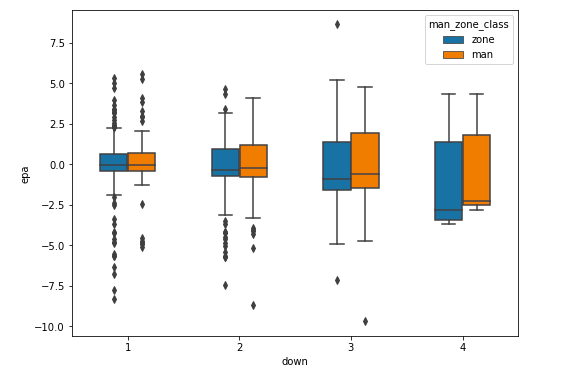 
*Lower EPA scores are better for the defense*

According to [smartfootball.com](http://smartfootball.com/passing/attacking-coverages-in-the-passing-game#sthash.7Dp4UDCu.dpbs), the first advantage of a man coverage scheme is the ability to bring extra pass rushers (5+). Additionally, NFL teams brought 5+ pass rushers on 3rd down 32% of the time (7% higher than 1st or 2nd down). Does man defense work better on 3rd down when defenses tend to send additional pass rushers?

On 3rd down blitzes, zone coverages outperform man coverages by -.84 average EPA, the highest discrepancy across any 1-3 down and blitz combination.

While NFL defenses already prefer zone to man coverage at a rate of roughly 2 to 1, this evidence suggests that perhaps zone should be even more dominant. Teams should especially prefer zone blitzes.

## Recommendation and conclusions

The analysis presented here is just the beginning of what is possible by reperesenting fundamental coaching concepts using tracking data with automatic play charting. Playbooks incorporate reams of special directions that have been invisible to analytics. Now we can start to bridge this gap.

A potential partnership between coaching and analytics:

1. Coaching staff identifies an important play dynamic (such as safety buzz)
2. Analytics staff and coaching staff work together to label representative plays
3. Analytics staff builds classifier that can accurately identify play dynamic
3. Analytics staff provides insights and recommendations tailored to coaching decisions
4. Coaches increase chance of winning by optimizing desicions

#### Benefits of automatic play charting

- **Efficiency** - The need to spend tedious hours manually charting plays would be greatly reduced.
- **Partnership** - Analytics and coaching staffs would begin to incorporate each other's perspectives, improving both groups output.
- **Winning** The teams that adopt automatic play charting first will have an edge.